In [2]:
from utils.datasets import *
from PIL import Image,ImageDraw
import cv2
import matplotlib.pylab as plt
import numpy as np
import imutils
%matplotlib inline
dataset = ListDataset('data/train', augment=False, multiscale=True)

2048
tensor(19.)
tensor(106.)
tensor(1531.)
tensor(1592.)
tensor(737.)
tensor(1082.)
tensor(1298.)
tensor(1380.)
tensor(252.)
tensor(470.)
tensor(993.)
tensor(1068.)
tensor(487.)
tensor(705.)
tensor(954.)
tensor(1024.)
tensor(393.)
tensor(773.)
tensor(828.)
tensor(963.)
tensor(36.)
tensor(242.)
tensor(1029.)
tensor(1099.)
tensor(66.)
tensor(258.)
tensor(790.)
tensor(986.)
tensor(823.)
tensor(1581.)
tensor(668.)
tensor(884.)
tensor(58.)
tensor(1435.)
tensor(955.)
tensor(1324.)
tensor(229.)
tensor(392.)
tensor(786.)
tensor(943.)
tensor(721.)
tensor(911.)
tensor(1459.)
tensor(1549.)
tensor(1084.)
tensor(1548.)
tensor(1410.)
tensor(1518.)
tensor(446.)
tensor(648.)
tensor(1343.)
tensor(1416.)
tensor(269.)
tensor(434.)
tensor(1368.)
tensor(1431.)
tensor(1094.)
tensor(1590.)
tensor(508.)
tensor(693.)
tensor(416.)
tensor(1078.)
tensor(598.)
tensor(843.)
tensor(329.)
tensor(520.)
tensor(1489.)
tensor(1557.)
tensor(326.)
tensor(440.)
tensor(1561.)
tensor(1587.)
tensor(438.)
tensor(501.)
tensor(1

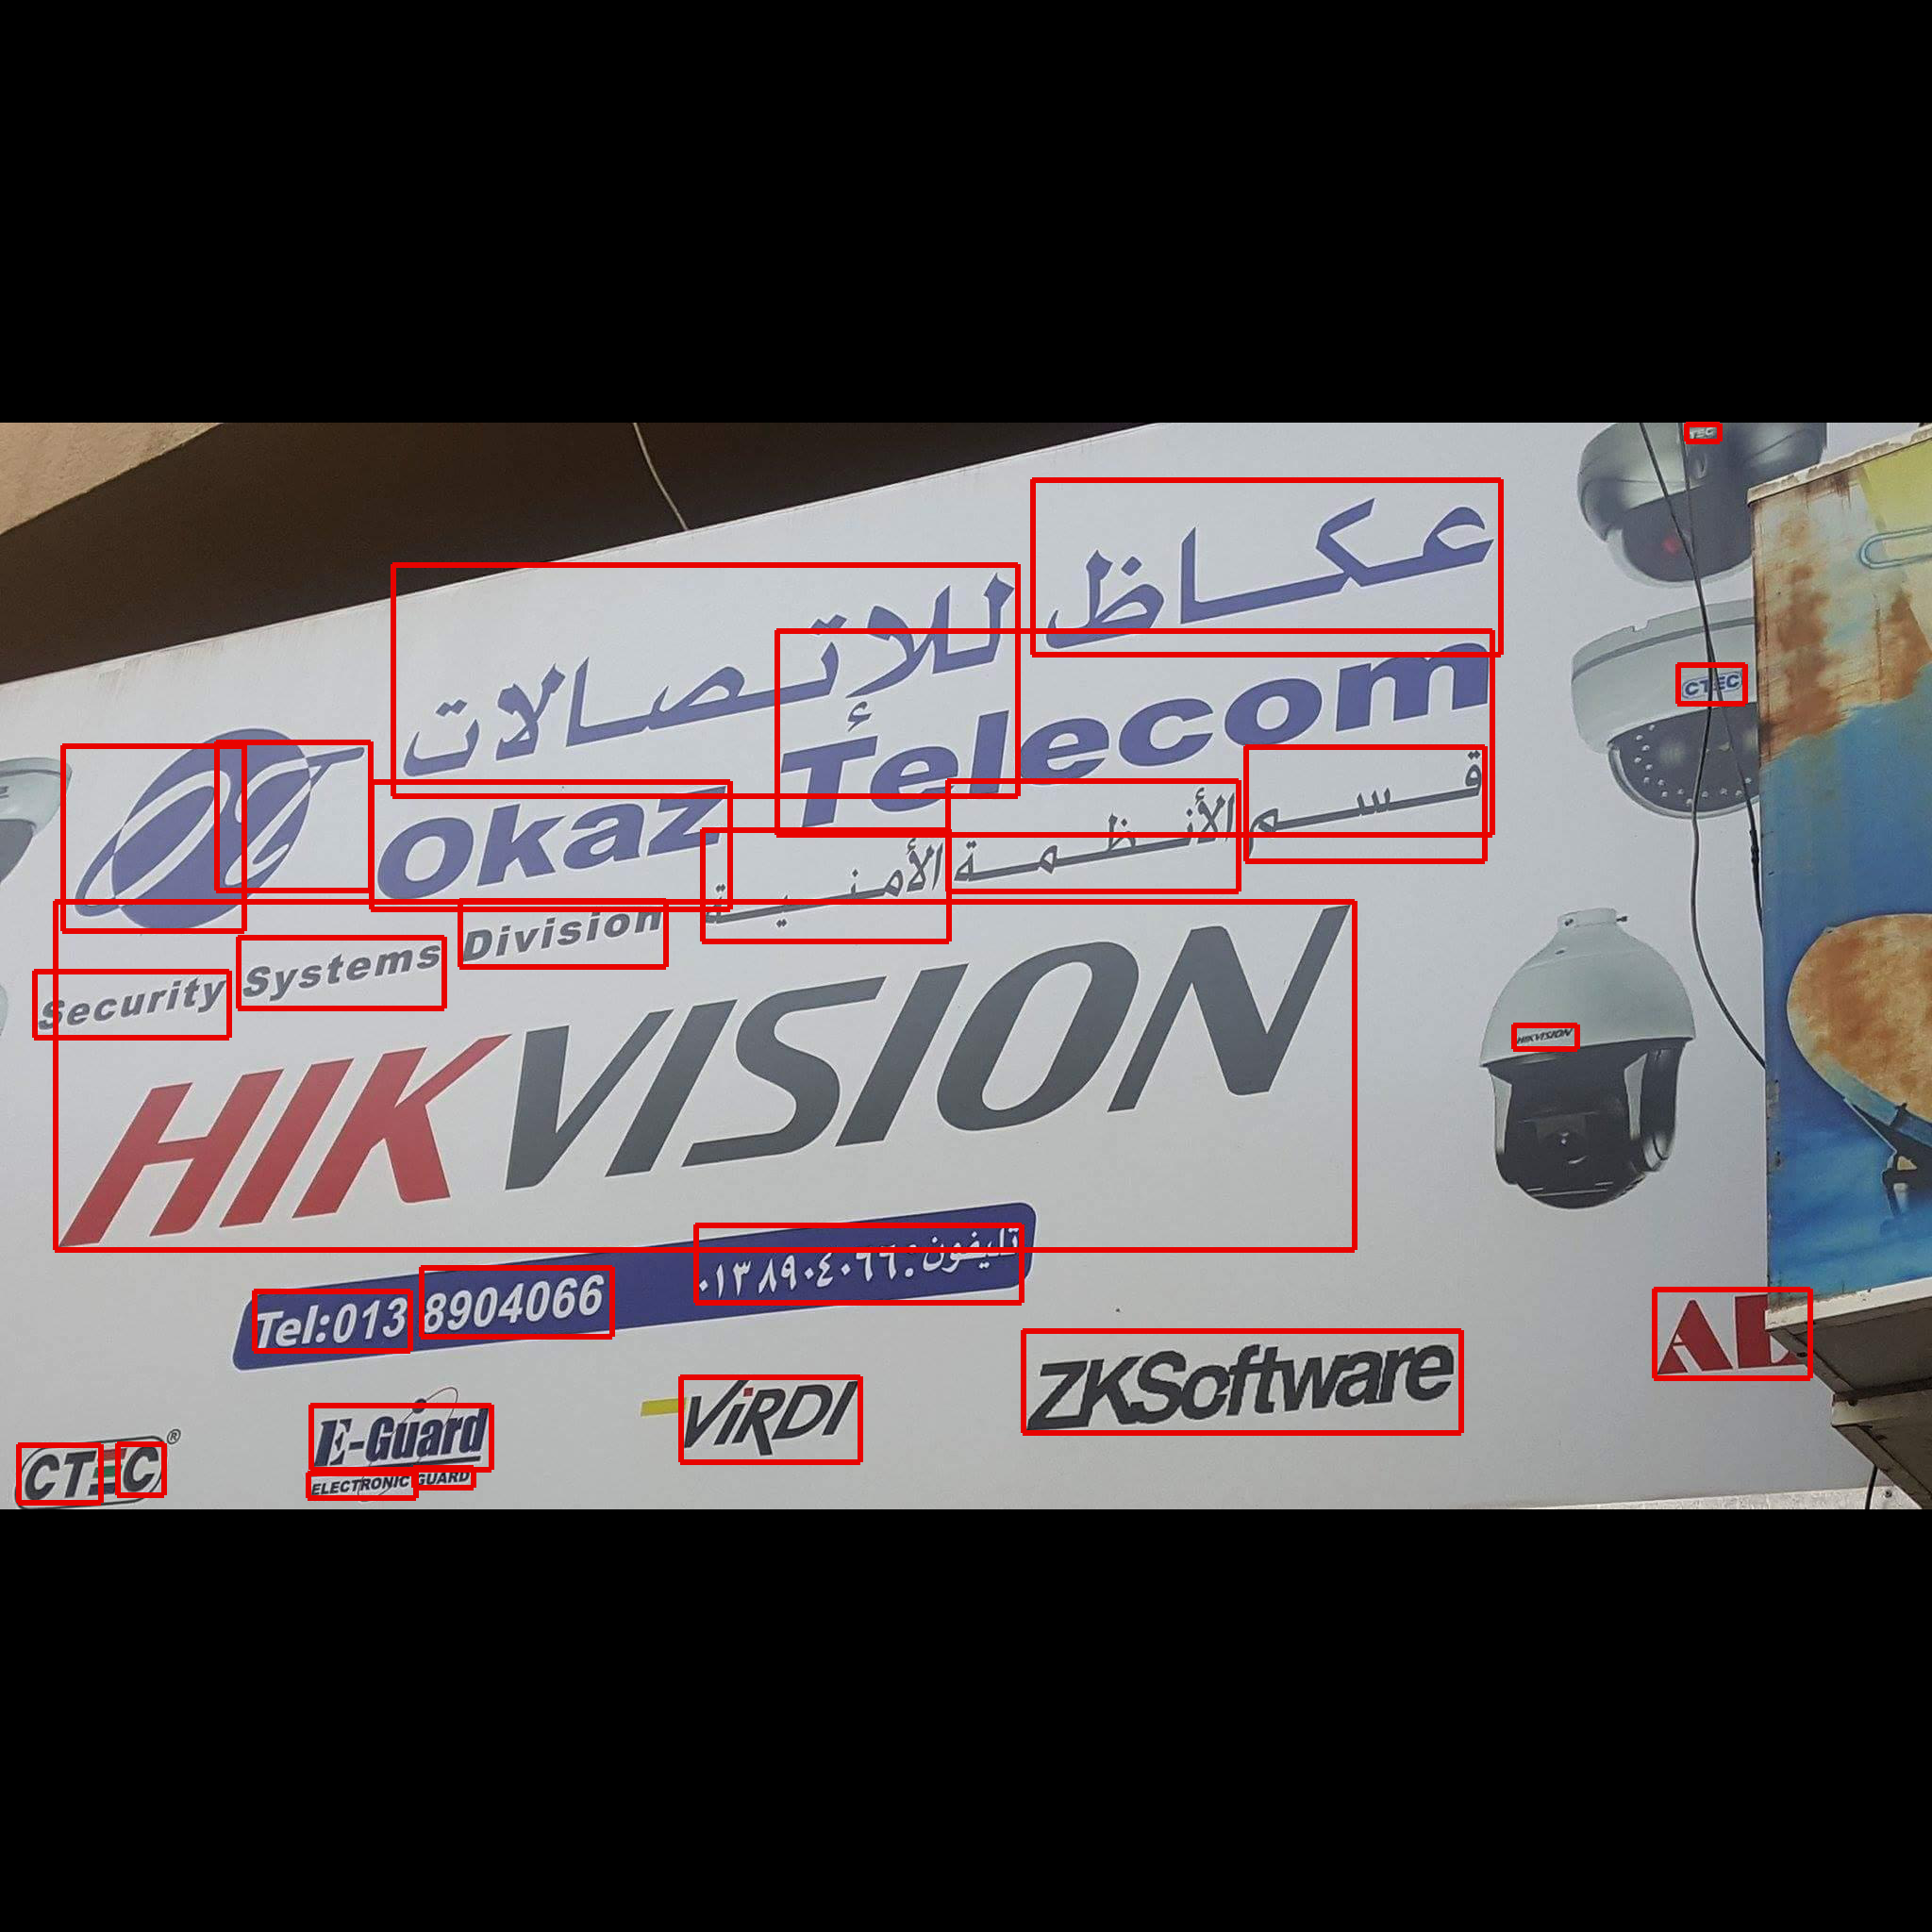

In [3]:
i = 0
img = np.uint8(255*np.transpose(np.array(dataset[i][1]),(1,2,0)))
img = Image.fromarray(img) 
oriw,orih = img.size
print(oriw)
n = len(dataset[i][2])
for j in range(n):
    x,y,w,h = dataset[i][2][j][2:6]
    x1 = oriw * (x -w / 2)
    print(x1)
    x2 = oriw * (x +w / 2)
    print(x2)

    y1 = orih * (y -h / 2)
    print(y1)

    y2 = orih * (y +h / 2)
    print(y2)

    point1 = [x1,y1]#x1,y1
    point2 = [x1,y2]#x1,y2
    point3 = [x2,y1]#x2,y1
    point4 = [x2,y2]#x2,y2
    draw = ImageDraw.Draw(img) #实例化一个对象
    draw.line(tuple(point1+point3), fill=1000,width=6)
    draw.line(tuple(point1+point2), fill=1000,width=6)
    draw.line(tuple(point2+point4), fill=1000,width=6)
    draw.line(tuple(point3+point4), fill=1000,width=6)
img

In [ ]:
img = dataset[0][1]
target = dataset[0][2]
ori_w = img.shape[1]
ori_h = img.shape[2]
x = target[0][2]*ori_w
y = target[0][3]*ori_h
w = target[0][4]*ori_w
h = target[0][5]*ori_h
theta = target[0][6]

In [ ]:
img = dataset[0][1]
img = np.uint8(255*np.transpose(np.array(img),(1,2,0)))
img = Image.fromarray(img) 

target = dataset[0][2]
oriw,orih = img.size
for i in range(len(target)):
    x = target[i][2]*ori_w
    y = target[i][3]*ori_h
    w = target[i][4]*ori_w
    h = target[i][5]*ori_h
    theta = target[i][6]


    rect = ((x.item(),y.item()),(w.item(),h.item()),theta.item())
    box = cv2.cv.Boxpoints() if imutils.is_cv2()else cv2.boxPoints(rect)
    box = np.int0(box)

    point1 = box[0].tolist()
    point2 = box[1].tolist()
    point3 = box[2].tolist()
    point4 = box[3].tolist()
    draw = ImageDraw.Draw(img) #实例化一个对象
    draw.line(tuple(point1+point2), fill=1000,width=6)
    draw.line(tuple(point1+point4), fill=1000,width=6)
    draw.line(tuple(point+point4), fill=1000,width=6)
    draw.line(tuple(point3+point2), fill=1000,width=6)
img